# Analysis and Classification of the UCI Mushroom data set
### Data obtain from [Kaggle](https://www.kaggle.com/datasets/uciml/mushroom-classification)
#### Naveen Gundelli

## Introduction
1. **Objective:** The goal of this project was to classify mushrooms as either edible or poisonous using machine learning models based on categorical features like odor, gill-size, and others. The dataset consists of 8,124 mushroom samples with 23 features.
2. **Importance:** This classification task is critical for ensuring safety in scenarios where misidentifying poisonous mushrooms could have harmful consequences.

## Dataset Overview
### Dataset Description:

1. The dataset contains 8,124 entries and 23 categorical features, all of which are fully populated (no missing values).
The target variable (class) indicates whether a mushroom is **edible (e)** or **poisonous (p)**.

2. **Key Features:**
Examples include odor, gill-size, cap-color, and habitat.
Features were one-hot encoded for compatibility with machine learning algorithms.

3. **Class Distribution:**
Edible: **51.8%**,
Poisonous: **48.2%**,
The class distribution is balanced, ensuring no bias toward one class.

### Loading in data

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# load in data
df = pd.read_csv('mushrooms.csv')

### Exploratory Data Analysis

In [22]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [23]:
# cleaning and checks
# missing vals check
print(df.isnull().sum())

# check for dupliacte rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
mushrooms_df = df.drop_duplicates()

# check unique vals for each column
for column in mushrooms_df.columns:
    print(f"{column}: {mushrooms_df[column].unique()}")

# since categorical columns don't really have outliers in a numeric sense,
# it is important to go through the data and make sure it is consistent.
# variables should not have unknown values in them.

# inspect column types
print(mushrooms_df.dtypes)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64
Number of duplicate rows: 0
class: ['p' 'e']
cap-shape: ['x' 'b' 's' 'f' 'k' 'c']
cap-surface: ['s' 'y' 'f' 'g']
cap-color: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises: ['t' 'f']
odor: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment: ['f' 'a']
gill-spacing: ['c' 'w']
gill-size: ['n' '

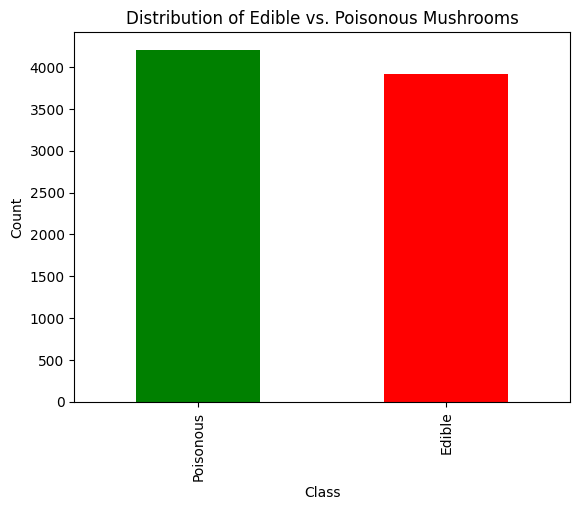

In [24]:
# EDA
# Target variable distribution
mushrooms_df['class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Edible vs. Poisonous Mushrooms')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Poisonous', 'Edible'])
plt.show()

<Figure size 800x500 with 0 Axes>

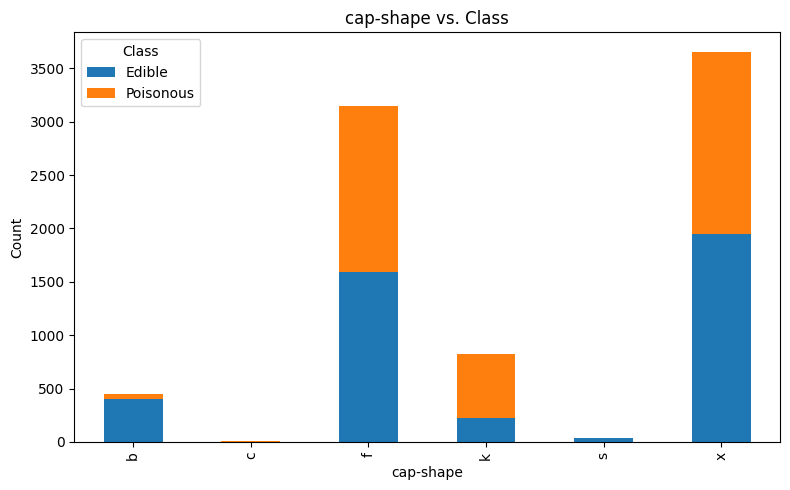

<Figure size 800x500 with 0 Axes>

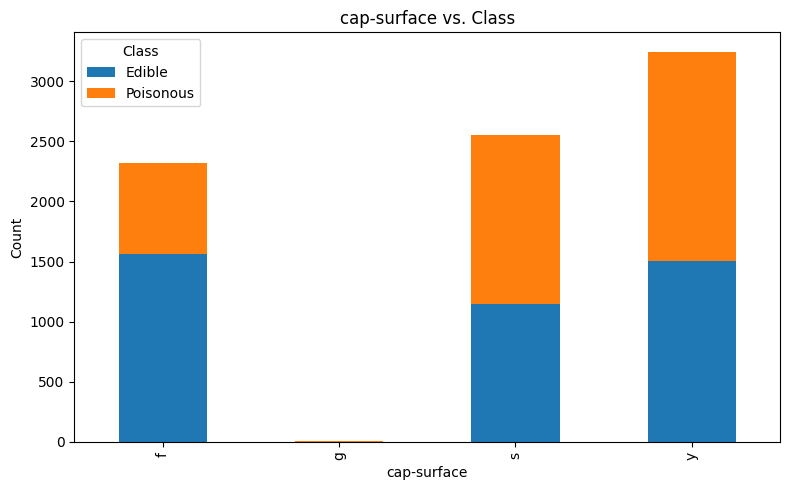

<Figure size 800x500 with 0 Axes>

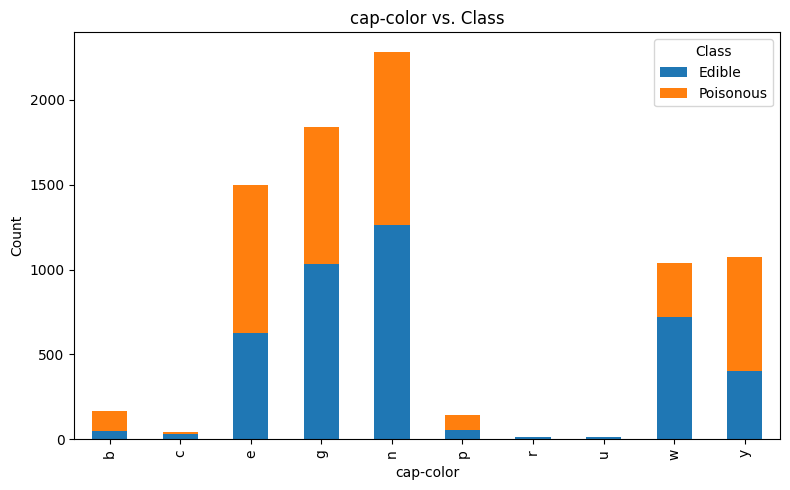

<Figure size 800x500 with 0 Axes>

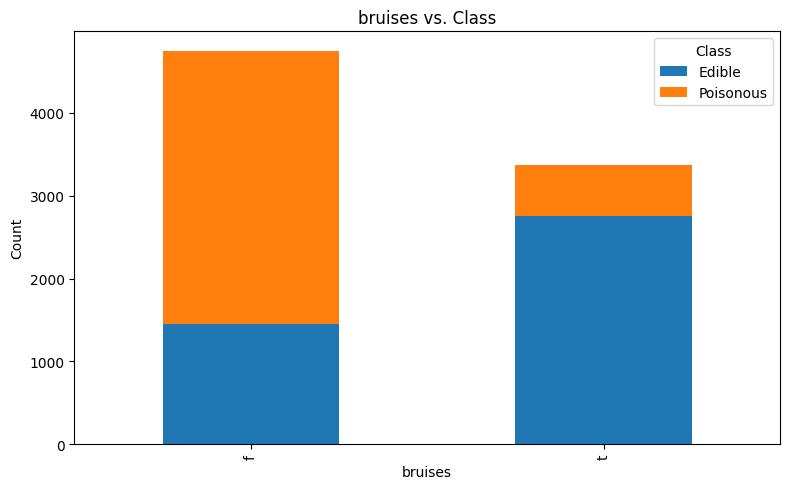

<Figure size 800x500 with 0 Axes>

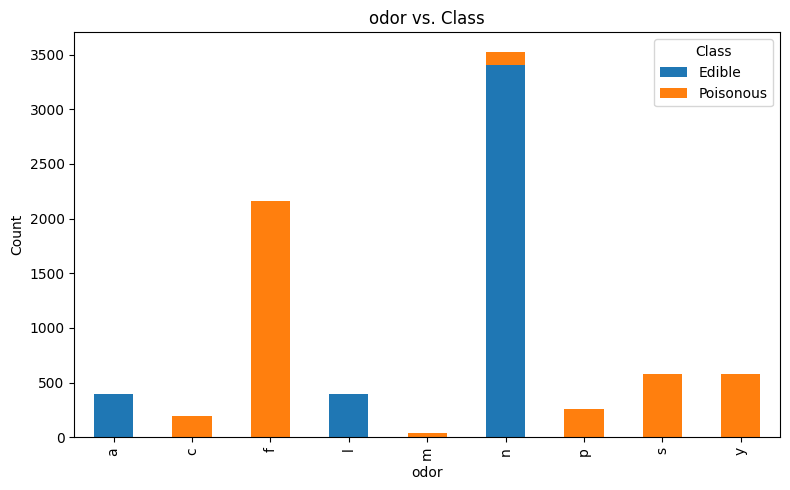

<Figure size 800x500 with 0 Axes>

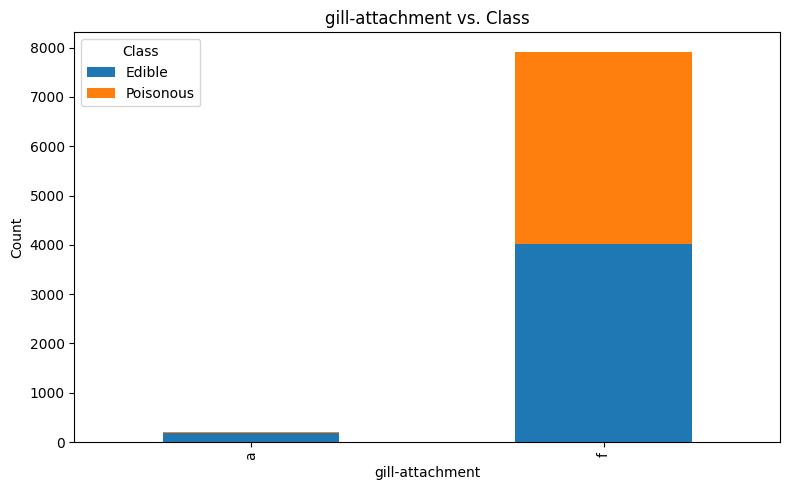

<Figure size 800x500 with 0 Axes>

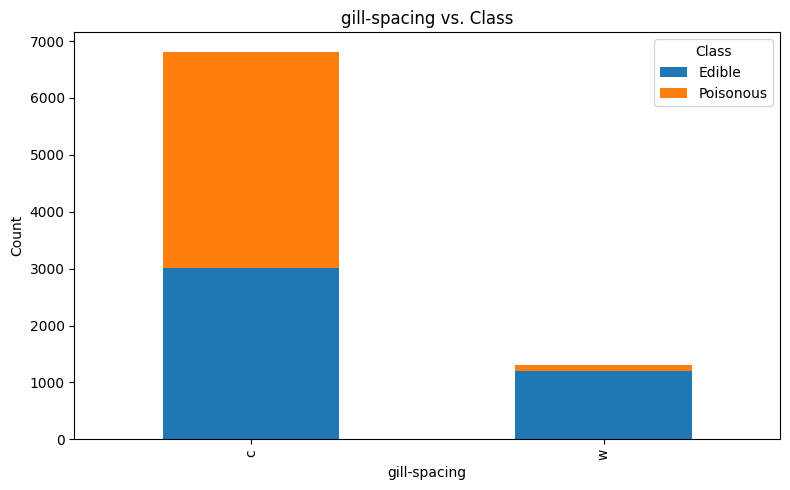

<Figure size 800x500 with 0 Axes>

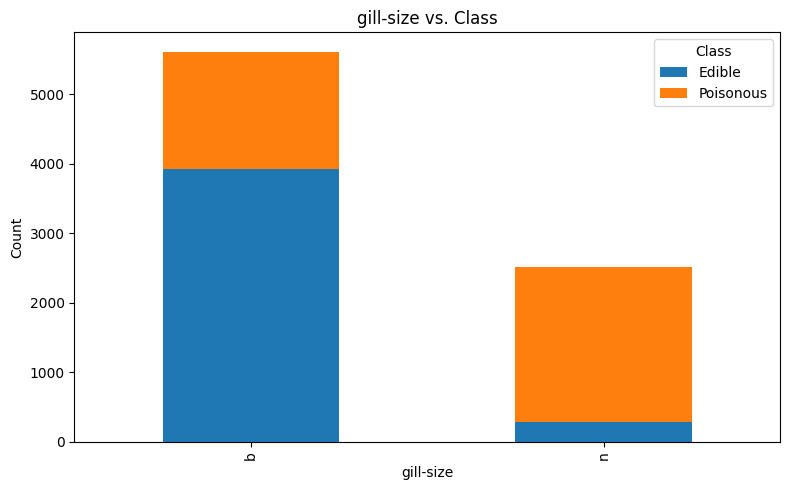

<Figure size 800x500 with 0 Axes>

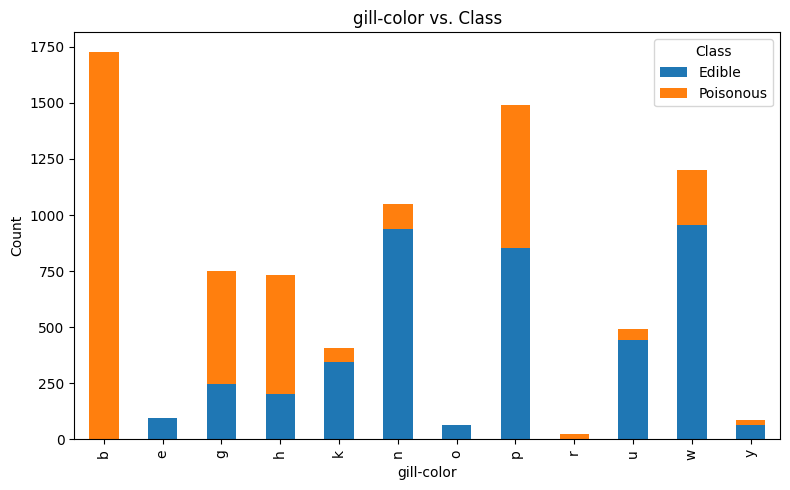

<Figure size 800x500 with 0 Axes>

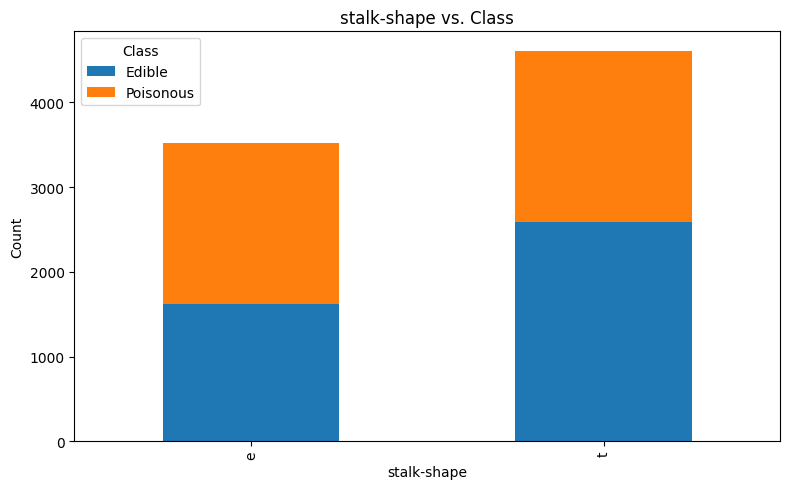

<Figure size 800x500 with 0 Axes>

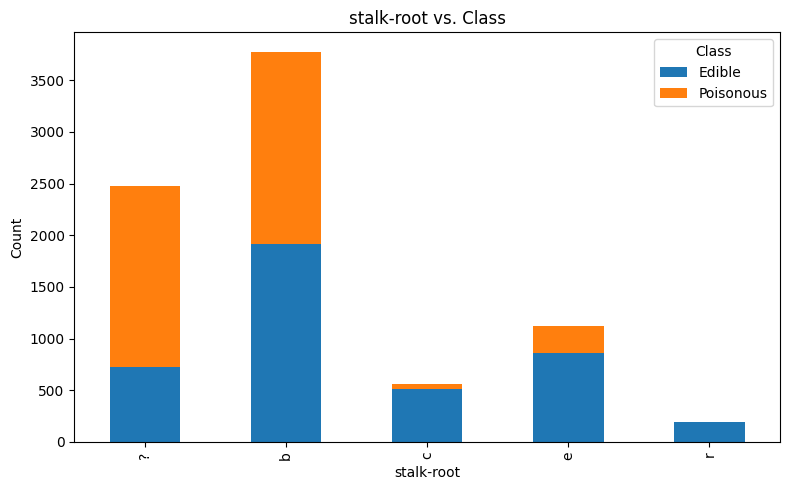

<Figure size 800x500 with 0 Axes>

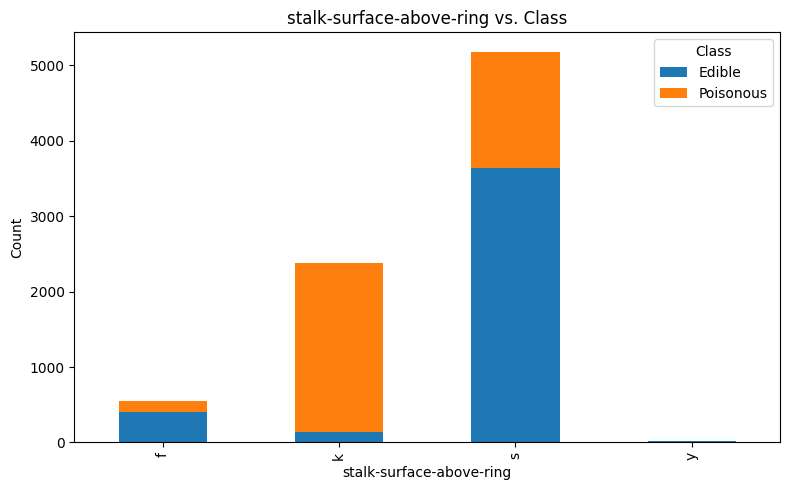

<Figure size 800x500 with 0 Axes>

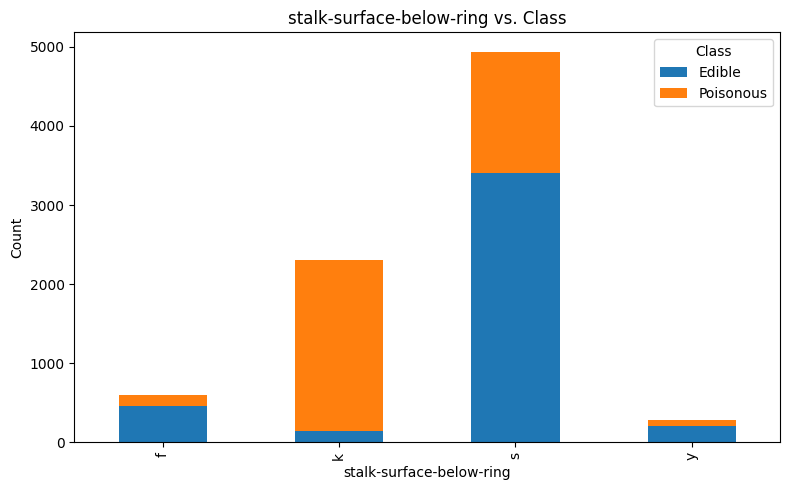

<Figure size 800x500 with 0 Axes>

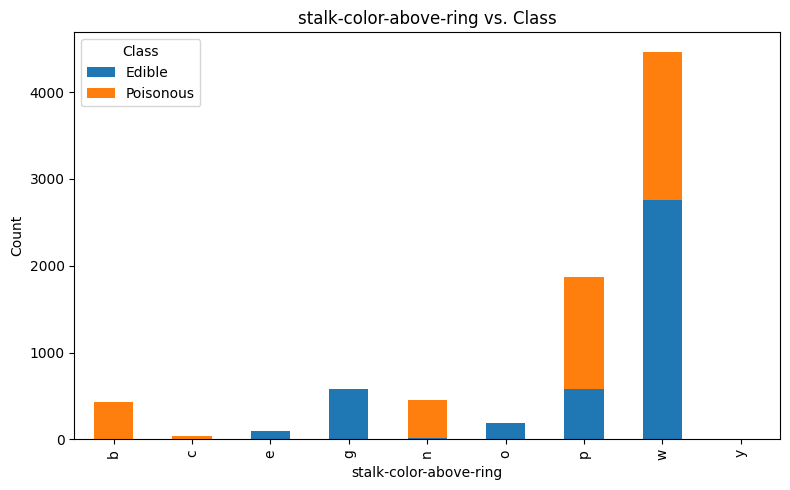

<Figure size 800x500 with 0 Axes>

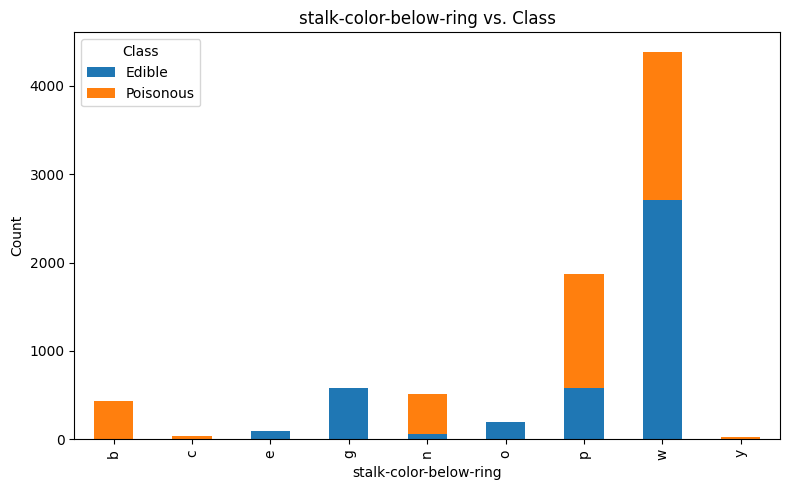

<Figure size 800x500 with 0 Axes>

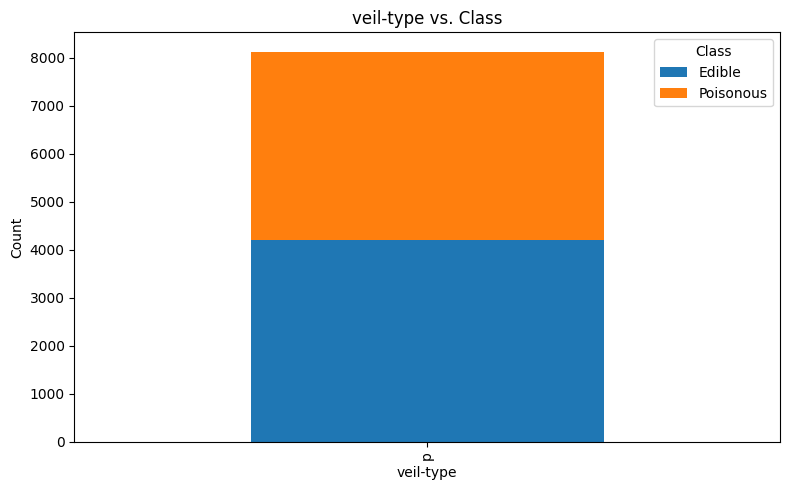

<Figure size 800x500 with 0 Axes>

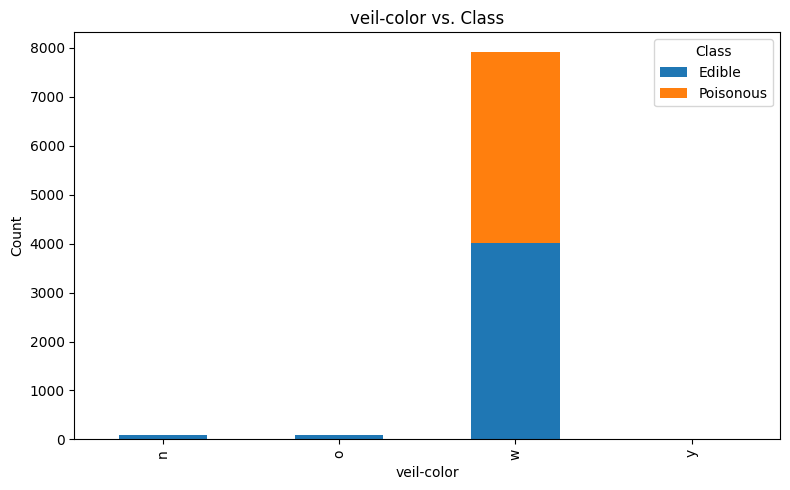

<Figure size 800x500 with 0 Axes>

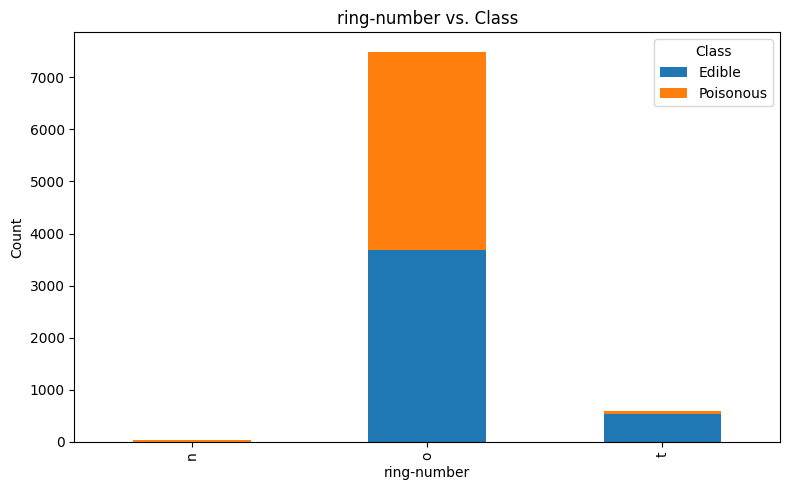

<Figure size 800x500 with 0 Axes>

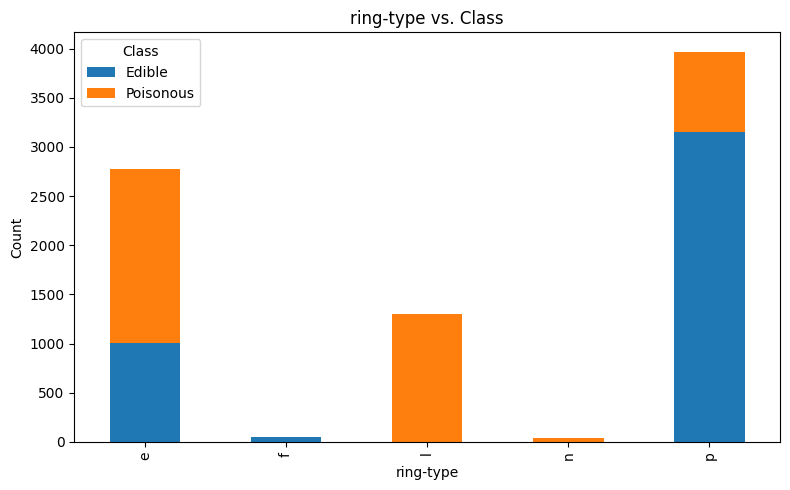

<Figure size 800x500 with 0 Axes>

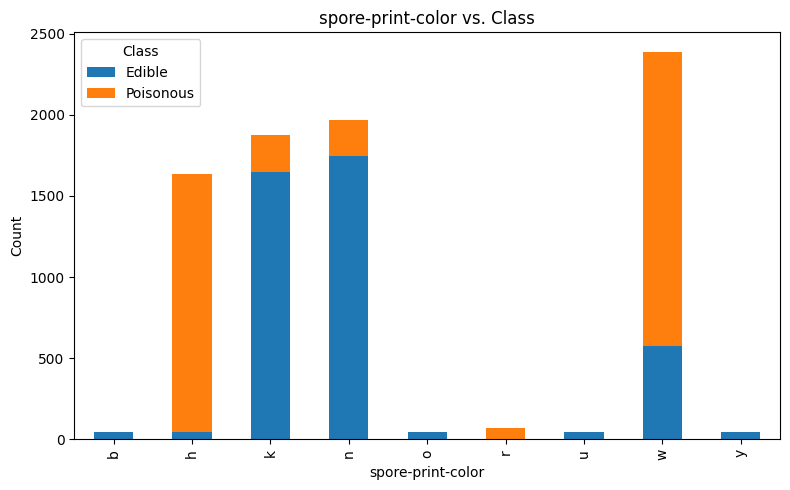

<Figure size 800x500 with 0 Axes>

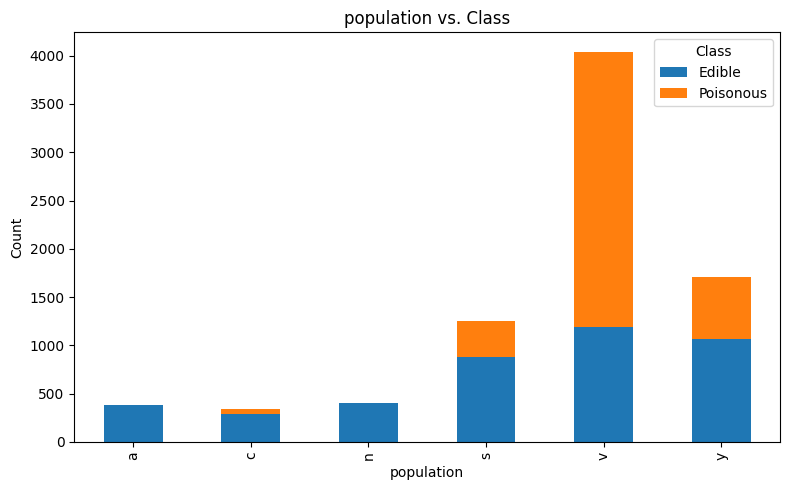

<Figure size 800x500 with 0 Axes>

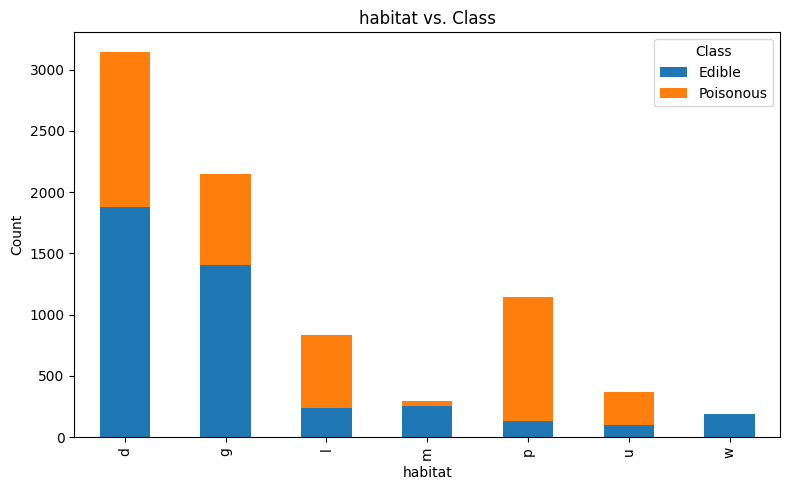

In [25]:
import seaborn as sns

# Visualize relationships between all features and the class variable
for column in mushrooms_df.columns[1:]:  # Skip the 'class' column
    plt.figure(figsize=(8, 5))
    feature_class = mushrooms_df.groupby([column, 'class']).size().unstack()
    feature_class.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'{column} vs. Class')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(['Edible', 'Poisonous'], title='Class')
    plt.tight_layout()
    plt.show()

**EDA Key Insights:**

The odor feature was found to be highly indicative of a mushroom's edibility, with specific odors strongly associated with poisonous mushrooms.
Features like gill-size and spore-print-color also showed significant differences between edible and poisonous mushrooms.

**Visualizations:**
Bar plots were generated to illustrate the relationship between each feature and the class.
odor had the strongest separation between classes, followed by gill-size and spore-print-color.

### Classification and Validation

In [26]:
# Classification
# One-hot encode categorical variables
mushrooms_encoded = pd.get_dummies(mushrooms_df, drop_first=True)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data
X = mushrooms_encoded.drop('class_p', axis=1)  # 'class_p' corresponds to 'poisonous'
y = mushrooms_encoded['class_p']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]


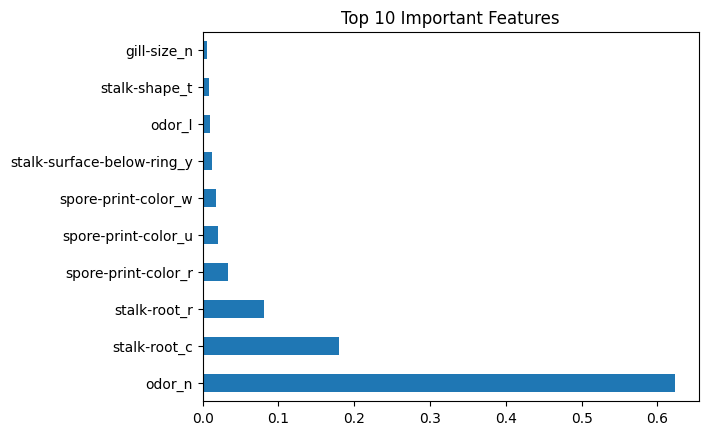

In [28]:
# Feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-validation accuracy: {scores.mean():.2f} (+/- {scores.std():.2f})")


Cross-validation accuracy: 0.97 (+/- 0.06)


Random Forest Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]


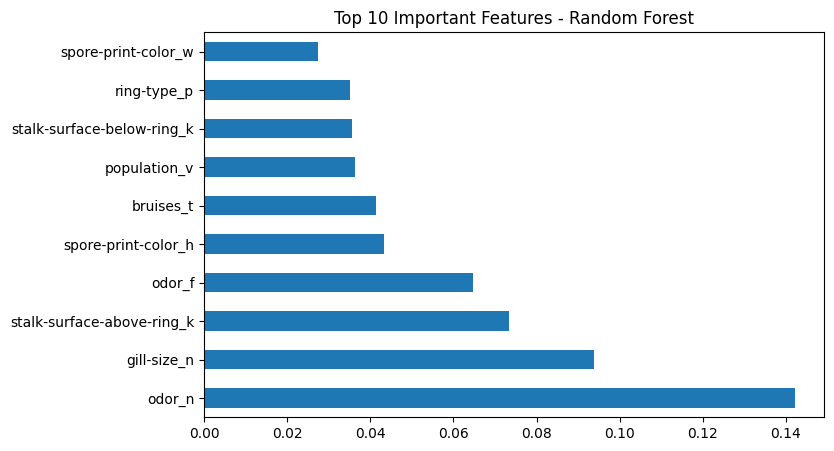

In [30]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train a Random Forest model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Evaluate the Random Forest model
y_pred_rf = rf_clf.predict(X_test)

# Metrics
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Feature importance visualization
importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8, 5))
plt.title('Top 10 Important Features - Random Forest')
plt.show()
